# **Which employees are likely to leave the company?**

In this project, I will build a model to predict whether an employee will leave the company using data from employees who have left or remain at the company.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('employee_attrition.csv')
df.head()

,EmployeeID,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department,JobRole,Attrition
0,20001,53,2694.0,4,3,1,No,HR,Software Engineer,0
1,20002,41,2273.0,7,4,1,No,Operations,Software Engineer,0
2,20003,43,2317.0,10,3,2,No,Tech,Data Analyst,0
3,20004,51,2549.0,2,4,4,No,Tech,HR Specialist,0
4,20005,40,3861.0,10,2,2,No,Tech,Software Engineer,0


In [ ]:
df.columns

Index(['EmployeeID', 'Age', 'MonthlyIncome', 'YearsAtCompany',
       'JobSatisfaction', 'WorkLifeBalance', 'OverTime', 'Department',
       'JobRole', 'Attrition'],
      dtype='object')

**Variables**

1. EmployeeID
2. Age
3. MonthlyIncome
4. YearsAtCompany
5. JobSatisfaction: Measured on a Likert scale from 1 to 4
6. WorkLifeBalance: Measured on a Likert scale from 1 to 4
7. OverTime: Yes or No
8. Department
9. JobRole
10. Attrition: left (1) vs stayed (0)

In [ ]:
# survey the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       600 non-null    int64 
 1   Age              600 non-null    int64 
 2   MonthlyIncome    600 non-null    object
 3   YearsAtCompany   600 non-null    int64 
 4   JobSatisfaction  600 non-null    int64 
 5   WorkLifeBalance  600 non-null    int64 
 6   OverTime         600 non-null    object
 7   Department       600 non-null    object
 8   JobRole          600 non-null    object
 9   Attrition        600 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 47.0+ KB


Note that the Dtype for MonthlyIncome is ‘object’

Missing values were marked by ‘?’, which is a string. Therefore, MonthlyIncome likely has at least one ‘?’.

In [ ]:
# Find the '?'
(df == '?').sum()

,0
EmployeeID,0
Age,0
MonthlyIncome,18
YearsAtCompany,0
JobSatisfaction,0
WorkLifeBalance,0
OverTime,0
Department,0
JobRole,12
Attrition,0


In [ ]:
# Replace '?' with missing values that Python can recognise.
df = df.replace('?', np.nan)

In [ ]:
# Alternatively:
# df.replace('?', np.nan, inplace=True)

In [ ]:
(df == '?').sum()

,0
EmployeeID,0
Age,0
MonthlyIncome,0
YearsAtCompany,0
JobSatisfaction,0
WorkLifeBalance,0
OverTime,0
Department,0
JobRole,0
Attrition,0


In [ ]:
# Check for missing values
df.isna().sum()

,0
EmployeeID,0
Age,0
MonthlyIncome,18
YearsAtCompany,0
JobSatisfaction,0
WorkLifeBalance,0
OverTime,0
Department,0
JobRole,12
Attrition,0


When a record contains a missing value, the model ignores the entire record. So, we need to impute the missing values to avoid losing information.

Yet, before we can impute monthly income, we need to convert it to a numerical data type.

In [ ]:
# Convert MonthlyIncome to numeric data type
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'])

In [ ]:
df[df['MonthlyIncome'].isna() & df['JobRole'].isna()]

,EmployeeID,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department,JobRole,Attrition


For all employees without values in the MonthlyIncome column, there are values in the JobRole column. Therefore, we can use the job role to add some detail to how we impute monthly income.

In [ ]:
# Calculate mean monthly income per job role
df.groupby('JobRole')['MonthlyIncome'].mean().round()

,MonthlyIncome
JobRole,
Data Analyst,2471.0
HR Specialist,2428.0
Operations Associate,2603.0
Sales Rep,2415.0
Software Engineer,2342.0


In [ ]:
means = df.groupby('JobRole')['MonthlyIncome'].mean().round()

In [ ]:
df[df['MonthlyIncome'].isna() & (df['JobRole'] == 'Data Analyst')]

,EmployeeID,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department,JobRole,Attrition
451,20452,23,NaN,13,3,1,Yes,Tech,Data Analyst,0
466,20467,36,NaN,6,2,1,No,Tech,Data Analyst,0


In [ ]:
# Impute monthly income with means per job role
for i in means.index:
    df.loc[df['MonthlyIncome'].isna() & (df['JobRole'] == i), 'MonthlyIncome'] = means.loc[i]

In [ ]:
# Impute job role with mode
df['JobRole'].mode()

,JobRole
0,Software Engineer


In [ ]:
df['JobRole'] = df['JobRole'].fillna(df['JobRole'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EmployeeID       600 non-null    int64  
 1   Age              600 non-null    int64  
 2   MonthlyIncome    600 non-null    float64
 3   YearsAtCompany   600 non-null    int64  
 4   JobSatisfaction  600 non-null    int64  
 5   WorkLifeBalance  600 non-null    int64  
 6   OverTime         600 non-null    object 
 7   Department       600 non-null    object 
 8   JobRole          600 non-null    object 
 9   Attrition        600 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 47.0+ KB


In [ ]:
# Check distribution of attrition
df['Attrition'].value_counts()

,count
Attrition,
0,469
1,131


In [ ]:
round((df['Attrition'].value_counts(normalize=True)*100), 2)

,proportion
Attrition,
0,78.17
1,21.83


In [ ]:
# Prepare features (X) and target (y)
# We drop `EmployeeID` because it’s only an identifier.
X = df.drop(columns=['EmployeeID', 'Attrition'])
y = df['Attrition']

In [ ]:
X.head()

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department,JobRole
0,53,2694.0,4,3,1,No,HR,Software Engineer
1,41,2273.0,7,4,1,No,Operations,Software Engineer
2,43,2317.0,10,3,2,No,Tech,Data Analyst
3,51,2549.0,2,4,4,No,Tech,HR Specialist
4,40,3861.0,10,2,2,No,Tech,Software Engineer


Logistic regression models cannot use categorical variables; only numeric and boolean variables can be used. Moreover, it makes more statistical sense to encode our categorical variables using one-hot encoding.

We will encode:
- OverTime
- Department
- JobRole


In [ ]:
# Encode overtime
ot_map = {'Yes': 1, 'No': 0}

In [ ]:
X['OverTime'] = X['OverTime'].map(ot_map)

In [ ]:
X.head()

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department,JobRole
0,53,2694.0,4,3,1,0,HR,Software Engineer
1,41,2273.0,7,4,1,0,Operations,Software Engineer
2,43,2317.0,10,3,2,0,Tech,Data Analyst
3,51,2549.0,2,4,4,0,Tech,HR Specialist
4,40,3861.0,10,2,2,0,Tech,Software Engineer


In [ ]:
# Encode department and job role
X_encoded = pd.get_dummies(X, columns=['Department', 'JobRole'], drop_first=True, dtype=int)

In [ ]:
X_encoded.head()

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department_Operations,Department_Sales,Department_Tech,JobRole_HR Specialist,JobRole_Operations Associate,JobRole_Sales Rep,JobRole_Software Engineer
0,53,2694.0,4,3,1,0,0,0,0,0,0,0,1
1,41,2273.0,7,4,1,0,1,0,0,0,0,0,1
2,43,2317.0,10,3,2,0,0,0,1,0,0,0,0
3,51,2549.0,2,4,4,0,0,0,1,1,0,0,0
4,40,3861.0,10,2,2,0,0,0,1,0,0,0,1


In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           600 non-null    int64  
 1   MonthlyIncome                 600 non-null    float64
 2   YearsAtCompany                600 non-null    int64  
 3   JobSatisfaction               600 non-null    int64  
 4   WorkLifeBalance               600 non-null    int64  
 5   OverTime                      600 non-null    int64  
 6   Department_Operations         600 non-null    int64  
 7   Department_Sales              600 non-null    int64  
 8   Department_Tech               600 non-null    int64  
 9   JobRole_HR Specialist         600 non-null    int64  
 10  JobRole_Operations Associate  600 non-null    int64  
 11  JobRole_Sales Rep             600 non-null    int64  
 12  JobRole_Software Engineer     600 non-null    int64  
dtypes: fl

To prevent variables measured on large-magnitude units from exerting excessive influence on model predictions, we should rescale the features so they are all on similar scales.

Logistic regression works better when features are on similar scales.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [ ]:
X_scaled.sample(5)

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Department_Operations,Department_Sales,Department_Tech,JobRole_HR Specialist,JobRole_Operations Associate,JobRole_Sales Rep,JobRole_Software Engineer
375,0.000000,0.449564,0.866667,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
475,0.205882,0.306849,0.400000,0.333333,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,0.088235,0.416189,0.866667,0.666667,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
579,0.911765,0.176588,0.266667,0.000000,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
512,0.588235,0.511333,0.600000,0.333333,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Check if train_test_split worked as expected
# The number of rows in the X_train data frame should equal the length of the y_train series
X_train.shape[0] == len(y_train)

True

In [ ]:
# The number of rows in the X_test data frame should equal the length of the y_test series
X_test.shape[0] == len(y_test)

True

**Build the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(solver='lbfgs', max_iter=1000)
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log_r.intercept_

array([-1.91644531])

In [ ]:
log_r.coef_

array([[-0.03925757, -0.31964679,  0.14781174, -0.29138095,  0.29057339,
         0.85053111,  0.06737681,  0.50792114,  0.18902195,  0.60551488,
         0.30453213, -0.1393529 ,  0.03973119]])

In [ ]:
coef_df = pd.DataFrame(data=log_r.coef_.T, index=X_scaled.columns, columns=['log_odds'])
coef_df

,log_odds
Age,-0.039258
MonthlyIncome,-0.319647
YearsAtCompany,0.147812
JobSatisfaction,-0.291381
WorkLifeBalance,0.290573
OverTime,0.850531
Department_Operations,0.067377
Department_Sales,0.507921
Department_Tech,0.189022
JobRole_HR Specialist,0.605515


In [ ]:
coef_df['odds'] = np.exp(coef_df['log_odds'])
coef_df

,log_odds,odds
Age,-0.039258,0.961503
MonthlyIncome,-0.319647,0.726406
YearsAtCompany,0.147812,1.159295
JobSatisfaction,-0.291381,0.747231
WorkLifeBalance,0.290573,1.337194
OverTime,0.850531,2.340890
Department_Operations,0.067377,1.069698
Department_Sales,0.507921,1.661833
Department_Tech,0.189022,1.208067
JobRole_HR Specialist,0.605515,1.832195


**Evaluate the model’s performance**

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
y_pred = log_r.predict(X_test)
y_prob = log_r.predict_proba(X_test)[:,1]

(array([ 9., 29., 20., 24.,  9., 11.,  7.,  6.,  2.,  3.]),
 array([0.06627762, 0.10836485, 0.15045207, 0.19253929, 0.23462651,
        0.27671374, 0.31880096, 0.36088818, 0.4029754 , 0.44506263,
        0.48714985]),
 <BarContainer object of 10 artists>)

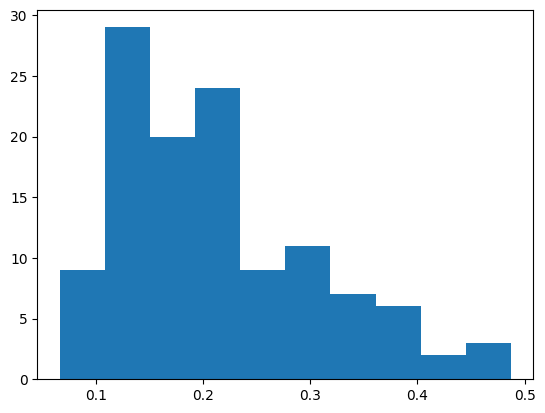

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_prob)

None of the employees in the test sample has a greater than 50% chance of leaving the company.

In [ ]:
# Use confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[88,  0],
       [32,  0]])

Key to confusion matrix

[[TN, TP]

[FN, FP]]

1. TN = 88
2. TP = 0
3. FN = 32
4. FP = 0

In [ ]:
TN = cm[0][0]
TN

np.int64(88)

In [ ]:
TP = cm[0][1]
TP

np.int64(0)

In [ ]:
FN = cm[1][0]
FN

np.int64(32)

In [ ]:
FP = cm[1,1]
FP

np.int64(0)

In [ ]:
# Alternatively
# Calculate True Positives, False Positives, True Negatives, False Negatives
TN = np.sum((y_test == 0) & (y_pred == 0))
TP = np.sum((y_test == 1) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))

In [ ]:
TN

np.int64(88)

In [ ]:
TP

np.int64(0)

In [ ]:
FN

np.int64(32)

In [ ]:
FP

np.int64(0)

In [ ]:
# Calculate scores
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

In [ ]:
print(f'Accuracy: {round(accuracy*100,2)}%')
print(f'Precision: {round(precision*100,2)}%')
print(f'Recall: {round(recall*100,2)}%')
print(f'F1 score: {round(f1*100,2)}%')

Accuracy: 73.33%
Precision: 0%
Recall: 0.0%
F1 score: 0%


The model predicted correctly whether an employee would leave or stay with the company 73.33% of the time.

Additionally, it predicted that none of the employees in the test sample would leave the company.